## Let's import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv("ipl_data.csv")   # Loading dataset

In [3]:
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
data.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [5]:
data.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

## Data preprocessing

In [6]:
# we are going to drop some features
ipl=data.drop(['mid','date','runs', 'wickets', 'overs','runs_last_5', 'wickets_last_5','striker','non-striker'],axis=1)

In [7]:
ipl.head(3)

,venue,bat_team,bowl_team,batsman,bowler,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222


In [8]:
ipl.isnull().sum()  # there is no null value present in dataset

venue        0
bat_team     0
bowl_team    0
batsman      0
bowler       0
total        0
dtype: int64

In [9]:
# Going to divide into two categories like independent vriable(x) and dependent vaariable(y).
x=ipl.drop('total',axis=1)
y=ipl.total

In [10]:
x.head(3)

,venue,bat_team,bowl_team,batsman,bowler
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar


In [11]:
y.head(3)

0    222
1    222
2    222
Name: total, dtype: int64

In [12]:
# we can see all the value's are not in numerical form so going to convert all the feature value to numeric format in x.
from sklearn.preprocessing import LabelEncoder

venue_encoder=LabelEncoder()
bat_team_encoder=LabelEncoder()
bowl_team_encoder=LabelEncoder()
batsman_encoder=LabelEncoder()
bowler_encoder=LabelEncoder()

x['venue']=venue_encoder.fit_transform(x['venue'])
x['bat_team']=bat_team_encoder.fit_transform(x['bat_team'])
x['bowl_team']=bowl_team_encoder.fit_transform(x['bowl_team'])
x['batsman']=batsman_encoder.fit_transform(x['batsman'])
x['bowler']=bowler_encoder.fit_transform(x['bowler'])

## Train Test Split

We have split the data into training and testing sets. The training set contains 70 percent of the dataset and rest 30 percent is in test set.
X_train contains the training data for your input features.
X_test contains the testing data for your input features.
y_train contains the training data for your target variable.
y_test contains the testing data for your target variable.

In [13]:
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [14]:
x.head()

,venue,bat_team,bowl_team,batsman,bowler
0,14,6,12,328,201
1,14,6,12,61,201
2,14,6,12,61,201
3,14,6,12,61,201
4,14,6,12,61,201


In [15]:
# we need to perform min-max scaling to input features to ensure that all the features are in same scale

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()


In [17]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

## Define the Neural Network

In [18]:
# We have defined a neural network using TensorFlow and Keras for regression.
# After defining the model, we have compiled the model using the Huber Loss.

In [19]:
import keras
import tensorflow as tf
model=keras.Sequential([
    keras.layers.Input(shape=(x_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),            # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),            # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')             # Output layer with linear activation for regression
])

huber_loss=tf.keras.losses.Huber(delta=1.0)
model.compile(optimizer='adam', loss='huber_loss')         # Use Huber loss for regression

# model trainig

In [33]:
# We have trained the neural network model using the scaled training data.


In [20]:
model.fit(x_train_scaled,y_train, epochs=50, batch_size=64, validation_data=(x_test_scaled,y_test))

Epoch 1/50
832/832 [==============================] - 7s 6ms/step - loss: 32.0692 - val_loss: 22.0273
Epoch 2/50
832/832 [==============================] - 5s 6ms/step - loss: 22.3492 - val_loss: 22.1408
Epoch 3/50
832/832 [==============================] - 5s 6ms/step - loss: 22.2727 - val_loss: 21.9499
Epoch 4/50
832/832 [==============================] - 4s 5ms/step - loss: 22.2507 - val_loss: 21.9076
Epoch 5/50
832/832 [==============================] - 4s 5ms/step - loss: 22.2039 - val_loss: 21.9450
Epoch 6/50
832/832 [==============================] - 4s 5ms/step - loss: 22.1764 - val_loss: 21.9264
Epoch 7/50
832/832 [==============================] - 5s 6ms/step - loss: 22.1922 - val_loss: 21.8138
Epoch 8/50
832/832 [==============================] - 5s 5ms/step - loss: 22.1300 - val_loss: 21.8155
Epoch 9/50
832/832 [==============================] - 4s 5ms/step - loss: 22.1064 - val_loss: 21.8753
Epoch 10/50
832/832 [==============================] - 4s 5ms/step - loss: 22.0752

<AxesSubplot:>

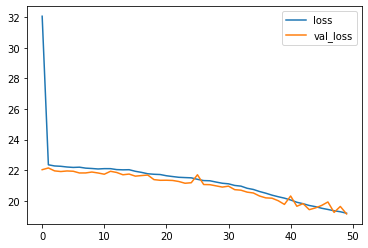

In [21]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

## Model Evaluation

In [22]:
# We have predicted using the trained neural network on the testing data.

In [23]:
predictions=model.predict(x_test_scaled)
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(y_test,predictions)

713/713 [==============================] - 2s 2ms/step


19.62458732252031

We have created an interactive widget using ipywidgets to predict the score based on user input for venue, batting team, bowling team, striker, and bowler.
We have created dropdown widgets to select values for venue, batting team, bowling team, striker, and bowler.
Then, we have added a “Predicted Score” button widget. Whenever, the button will be clicked, the predict_score function will be called and then perform the following steps:
Decodes the user-selected values to their original categorical values.
Encodes and scales these values to match the format used in model training.
Uses the trained model to make a prediction based on the user’s input.
Displays the predicted score

In [40]:
import ipywidgets as widgets
from IPython.display import display, clear_output
 
import warnings
warnings.filterwarnings("ignore")
 
venue = widgets.Dropdown(options=ipl['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =ipl['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=ipl['bowl_team'].unique().tolist(),  description='Select Batting Team:')
batsman = widgets.Dropdown(options=ipl['batsman'].unique().tolist(), description='Select Batsman:')
bowler = widgets.Dropdown(options=ipl['bowler'].unique().tolist(), description='Select Bowler:')
 
predict_button = widgets.Button(description="Predict Score")
 
def predict_score(b):
    with output:
        clear_output()  # Clear the previous output
         # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = bat_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowl_team_encoder.transform([bowling_team.value])
        decoded_batsman = batsman_encoder.transform([batsman.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])
 
 
        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_batsman, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])
 
        print(predicted_score)

The widget-based interface allows you to interactively predict the score for specific match scenarios. Now, we have set up the button to trigger the predict_score function when clicked and display the widgets for venue, batting team , bowling team, striker and bowler.

In [41]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, batsman, bowler, predict_button, output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Batsman:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()

We have predicted the score of the match between KKR and RCB in M chinnaswamy Stadium. The predicted score of the match is 161.